In [1]:
import polars as pl
import os
from pathlib import Path
import pandas as pd
import hvplot.polars
import datetime


stock_data = Path.cwd().parent / "Data/Stock_data/stock_data.csv"
stock_data1 = Path.cwd().parent / "Data/Stock_data/stock_data1.csv"
# parquet_file = (Path.cwd().parent / "Data/Option_data/SSO_complete")

data_path = Path.cwd().parent / "Data"

#Restrictions
timeperiod = [datetime.datetime(2019, 1, 1), datetime.datetime(2021, 12, 31)]

#Stock_split dates with quantity
nvidia_split = [datetime.datetime(2021, 7, 19), 4] #till 2021 needs to be split
amzn_split = [timeperiod[0], 20]
wmt_split = [timeperiod[0], 3]
tesla_split1 = [datetime.datetime(2020,8,28), 3]
tesla_split = [timeperiod[0], 5]

In [2]:
df = pl.scan_csv(stock_data1, separator=",")
df.schema
df.fetch(1000)

PERMNO,date,TICKER,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
i64,str,str,i64,f64,f64,f64,i64,f64,f64,f64,f64
10107,"""2016-01-04""","""MSFT""",8048,53.39,54.8,54.8,53777963,-0.012257,54.78,54.79,-0.012257
10107,"""2016-01-05""","""MSFT""",8048,54.54,55.39,55.05,34079890,0.004562,55.05,55.06,0.004562
10107,"""2016-01-06""","""MSFT""",8048,53.64,54.4001,54.05,39531720,-0.018165,54.06,54.08,-0.018165
10107,"""2016-01-07""","""MSFT""",8048,52.07,53.485,52.17,56560000,-0.034783,52.17,52.19,-0.034783
10107,"""2016-01-08""","""MSFT""",8048,52.15,53.28,52.33,48753969,0.003067,52.33,52.35,0.003067
…,…,…,…,…,…,…,…,…,…,…,…
10107,"""2019-12-16""","""MSFT""",8048,154.82001,155.89999,155.53,24119474,0.006471,155.53,155.53999,0.006471
10107,"""2019-12-17""","""MSFT""",8048,154.45,155.71001,154.69,25413765,-0.005401,154.78,154.78999,-0.005401
10107,"""2019-12-18""","""MSFT""",8048,154.17999,155.48,154.37,24077567,-0.002069,154.37,154.38,-0.002069


In [3]:
#Desired data types for the columns
int_cols = ["PERMNO", "PERMCO", "VOL"]
float_cols = ["BIDLO", "ASKHI", "RET", "BID", "ASK", "RETX", "PRC"]
datetime_cols = ["date"]
str_cols = ["TICKER"]
drop_cols = ["PERMCO"]

In [4]:
#one line to do all the above
df = df.with_columns(
    [ pl.col(int_cols).cast(pl.Int64),
      pl.col(float_cols).cast(pl.Float64),
      pl.col(datetime_cols).cast(pl.Date),
      pl.col(str_cols).cast(pl.String),
    ]
).drop(drop_cols)

In [5]:
df.fetch(1000)

PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
i64,date,str,f64,f64,f64,i64,f64,f64,f64,f64
10107,2016-01-04,"""MSFT""",53.39,54.8,54.8,53777963,-0.012257,54.78,54.79,-0.012257
10107,2016-01-05,"""MSFT""",54.54,55.39,55.05,34079890,0.004562,55.05,55.06,0.004562
10107,2016-01-06,"""MSFT""",53.64,54.4001,54.05,39531720,-0.018165,54.06,54.08,-0.018165
10107,2016-01-07,"""MSFT""",52.07,53.485,52.17,56560000,-0.034783,52.17,52.19,-0.034783
10107,2016-01-08,"""MSFT""",52.15,53.28,52.33,48753969,0.003067,52.33,52.35,0.003067
…,…,…,…,…,…,…,…,…,…,…
10107,2019-12-16,"""MSFT""",154.82001,155.89999,155.53,24119474,0.006471,155.53,155.53999,0.006471
10107,2019-12-17,"""MSFT""",154.45,155.71001,154.69,25413765,-0.005401,154.78,154.78999,-0.005401
10107,2019-12-18,"""MSFT""",154.17999,155.48,154.37,24077567,-0.002069,154.37,154.38,-0.002069


In [6]:
df.collect().approx_n_unique()

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_19056/3377993439.py:1: DeprecationWarning: `approx_n_unique` is deprecated. Use `select(pl.all().approx_n_unique())` instead.
  df.collect().approx_n_unique()


PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
10,1519,11,13186,13142,13001,15227,13267,12805,12984,13260


# Make adjustment to the bid and ask price collumns

In [7]:
#Change to pandas dataframe
df_pd = df.collect()

pd_df = df_pd.to_pandas()
#Change to the selected dates
pd_df = pd_df[(pd_df['date'] >= timeperiod[0]) & (pd_df['date'] <= timeperiod[1])]

#Change the name of the stocks
pd_df['TICKER'] = pd_df['TICKER'].replace('PCLN', 'BKNG')
pd_df['TICKER'] = pd_df['TICKER'].replace('IIVI', 'COHR')
pd_df['TICKER'] = pd_df['TICKER'].replace('FB', 'META')

unique_tickers = pd_df['TICKER'].unique()
print(unique_tickers)


['MSFT' 'META' 'COHR' 'WMT' 'AMZN' 'NVDA' 'BKNG' 'COST' 'EXPE' 'TSLA']


In [10]:
# Create a copy of pd_df
df_copy = pd_df.copy()

# Create a new column 'PRC_copy' that copies 'PRC'
df_copy['PRC_actual'] = df_copy['PRC']

#Nvidia
mask = (df_copy['TICKER'] == 'NVDA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= nvidia_split[0])
df_copy.loc[mask, ['PRC_actual']] /= nvidia_split[1]

#Amazon
mask1 = (df_copy['TICKER'] == 'AMZN') & (df_copy['date'] >= amzn_split[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask1, ['PRC_actual']] /= amzn_split[1]

#Walmarkt
mask2 = (df_copy['TICKER'] == 'WMT') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask2, ['PRC_actual']] /= wmt_split[1]

#Tesla
mask3 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask3, ['PRC_actual']] /= tesla_split1[1]

mask4 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= tesla_split1[0])
df_copy.loc[mask4, ['PRC_actual']] /= tesla_split[1]

df_copy.tail(500)

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX,PRC_actual
14610,93436,2020-01-09,TSLA,472.87000,498.79999,481.34000,28379982,-0.021945,481.35001,481.53000,-0.021945,32.089333
14611,93436,2020-01-10,TSLA,473.70001,484.94000,478.14999,12936566,-0.006627,477.91000,478.17999,-0.006627,31.876666
14612,93436,2020-01-13,TSLA,492.00000,525.63000,524.85999,26585353,0.097689,524.84003,524.84998,0.097689,34.990666
14613,93436,2020-01-14,TSLA,524.90002,547.40997,537.91998,28955735,0.024883,537.90997,538.00000,0.024883,35.861332
14614,93436,2020-01-15,TSLA,516.78528,537.84003,518.50000,17326831,-0.036102,518.48999,518.77002,-0.036102,34.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
15105,93436,2021-12-27,TSLA,1070.71521,1117.00000,1093.93994,23695249,0.025248,1093.81995,1093.83997,0.025248,364.646647
15106,93436,2021-12-28,TSLA,1078.42004,1118.99988,1088.46997,20025526,-0.005000,1088.68005,1089.19995,-0.005000,362.823323
15107,93436,2021-12-29,TSLA,1064.14001,1104.00000,1086.18994,18699667,-0.002095,1085.56995,1085.88000,-0.002095,362.063313
15108,93436,2021-12-30,TSLA,1053.15002,1095.55005,1070.33997,15595484,-0.014592,1070.27002,1070.32996,-0.014592,356.779990


In [8]:
# # Create a copy of pd_df
# df_copy = pd_df.copy()

# #Nvidia
# mask = (df_copy['TICKER'] == 'NVDA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= nvidia_split[0])
# df_copy.loc[mask, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= nvidia_split[1]

# #Amazon
# mask1 = (df_copy['TICKER'] == 'AMZN') & (df_copy['date'] >= amzn_split[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask1, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= amzn_split[1]

# #Walmarkt
# mask2 = (df_copy['TICKER'] == 'WMT') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask2, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= wmt_split[1]

# #Tesla
# mask3 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask3, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= tesla_split1[1]

# mask4 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= tesla_split1[0])
# df_copy.loc[mask4, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= tesla_split[1]

# # df_copy = df_copy[df_copy['TICKER'] == 'AMZN']

# df_copy.tail(500)

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
14610,93436,2020-01-09,TSLA,31.524667,33.253333,32.089333,28379982,-0.021945,32.090001,32.102000,-0.021945
14611,93436,2020-01-10,TSLA,31.580001,32.329333,31.876666,12936566,-0.006627,31.860667,31.878666,-0.006627
14612,93436,2020-01-13,TSLA,32.800000,35.042000,34.990666,26585353,0.097689,34.989335,34.989999,0.097689
14613,93436,2020-01-14,TSLA,34.993335,36.493998,35.861332,28955735,0.024883,35.860665,35.866667,0.024883
14614,93436,2020-01-15,TSLA,34.452352,35.856002,34.566667,17326831,-0.036102,34.565999,34.584668,-0.036102
...,...,...,...,...,...,...,...,...,...,...,...
15105,93436,2021-12-27,TSLA,356.905070,372.333333,364.646647,23695249,0.025248,364.606650,364.613323,0.025248
15106,93436,2021-12-28,TSLA,359.473347,372.999960,362.823323,20025526,-0.005000,362.893350,363.066650,-0.005000
15107,93436,2021-12-29,TSLA,354.713337,368.000000,362.063313,18699667,-0.002095,361.856650,361.960000,-0.002095
15108,93436,2021-12-30,TSLA,351.050007,365.183350,356.779990,15595484,-0.014592,356.756673,356.776653,-0.014592


## Cum returns added

In [11]:
df_new = df_copy

# Ensure that 'RET' is a float
df_new['RET'] = df_new['RET'].astype(float)

# Calculate the cumulative return for each stock and reset the index
cumulative_return = df_new.groupby('TICKER')['RET'].apply(lambda x: (1 + x).cumprod() - 1).reset_index(level=0, drop=True)

# Insert the 'cumulative_return' Series into the DataFrame
df_new['cumulative_return'] = cumulative_return

# Subtract the first value of the cumulative return for each group from the entire group
df_new['cumulative_return'] = df_new.groupby('TICKER')['cumulative_return'].transform(lambda x: x - x.iloc[0])

df_new


,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX,PRC_actual,cumulative_return
754,10107,2019-01-02,MSFT,98.94000,101.75000,101.12000,35347045,-0.004430,101.12000,101.13000,-0.004430,101.120000,0.000000
755,10107,2019-01-03,MSFT,97.20000,100.18500,97.40000,42570779,-0.036788,97.35000,97.38000,-0.036788,97.400000,-0.036625
756,10107,2019-01-04,MSFT,98.93000,102.51000,101.93000,44032862,0.046509,101.93000,101.94000,0.046509,101.930000,0.007975
757,10107,2019-01-07,MSFT,100.98000,103.26810,102.06000,35650303,0.001275,102.04000,102.06000,0.001275,102.060000,0.009254
758,10107,2019-01-08,MSFT,101.71340,103.97000,102.80000,31531077,0.007251,102.81000,102.82000,0.007251,102.800000,0.016540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,93436,2021-12-27,TSLA,1070.71521,1117.00000,1093.93994,23695249,0.025248,1093.81995,1093.83997,0.025248,364.646647,15.503510
15106,93436,2021-12-28,TSLA,1078.42004,1118.99988,1088.46997,20025526,-0.005000,1088.68005,1089.19995,-0.005000,362.823323,15.421333
15107,93436,2021-12-29,TSLA,1064.14001,1104.00000,1086.18994,18699667,-0.002095,1085.56995,1085.88000,-0.002095,362.063313,15.387073
15108,93436,2021-12-30,TSLA,1053.15002,1095.55005,1070.33997,15595484,-0.014592,1070.27002,1070.32996,-0.014592,356.779990,15.148947


# Save the results to a file

In [12]:
# Saving file
stock_path_parq = Path.cwd().parent / "Data/Stock_data/stock_data.parquet"

save_parquet = True
if save_parquet or not os.path.exists(stock_path_parq):
    df_new.to_parquet(stock_path_parq)

In [13]:
stock_path_parq = Path.cwd().parent / "Data/Stock_data/stock_data.parquet"
df = pl.read_parquet(stock_path_parq)
df.estimated_size("mb")

0.7789640426635742

In [14]:
df

PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX,PRC_actual,cumulative_return,__index_level_0__
i64,datetime[ms],str,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,i64
10107,2019-01-02 00:00:00,"""MSFT""",98.94,101.75,101.12,35347045,-0.00443,101.12,101.13,-0.00443,101.12,0.0,754
10107,2019-01-03 00:00:00,"""MSFT""",97.2,100.185,97.4,42570779,-0.036788,97.35,97.38,-0.036788,97.4,-0.036625,755
10107,2019-01-04 00:00:00,"""MSFT""",98.93,102.51,101.93,44032862,0.046509,101.93,101.94,0.046509,101.93,0.007975,756
10107,2019-01-07 00:00:00,"""MSFT""",100.98,103.2681,102.06,35650303,0.001275,102.04,102.06,0.001275,102.06,0.009254,757
10107,2019-01-08 00:00:00,"""MSFT""",101.7134,103.97,102.8,31531077,0.007251,102.81,102.82,0.007251,102.8,0.01654,758
…,…,…,…,…,…,…,…,…,…,…,…,…,…
93436,2021-12-27 00:00:00,"""TSLA""",1070.71521,1117.0,1093.93994,23695249,0.025248,1093.81995,1093.83997,0.025248,364.646647,15.50351,15105
93436,2021-12-28 00:00:00,"""TSLA""",1078.42004,1118.99988,1088.46997,20025526,-0.005,1088.68005,1089.19995,-0.005,362.823323,15.421333,15106
93436,2021-12-29 00:00:00,"""TSLA""",1064.14001,1104.0,1086.18994,18699667,-0.002095,1085.56995,1085.88,-0.002095,362.063313,15.387073,15107


## Use the original file with filtering instead of the parquet file

In [17]:
pd_df = df_copy

print(type(df))

# pd_df = df.to_pandas()



<class 'polars.dataframe.frame.DataFrame'>


## Visuals of the different stocks

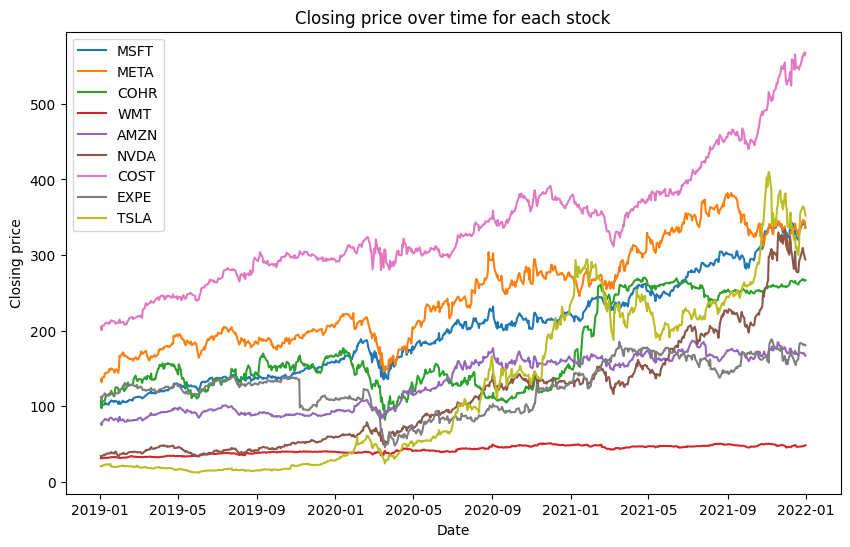

In [21]:
import matplotlib.pyplot as plt

# Ensure that 'date' is a datetime object
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Get the list of unique tickers
tickers = pd_df['TICKER'].unique()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a line for each ticker
for ticker in tickers:
    if ticker != "BKNG":
        df_ticker = pd_df[pd_df['TICKER'] == ticker]
        plt.plot(df_ticker['date'], df_ticker['PRC_actual'], label=ticker)
    
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Closing price over time for each stock')

# Add a legend
plt.legend()

# Show the plot
plt.show()

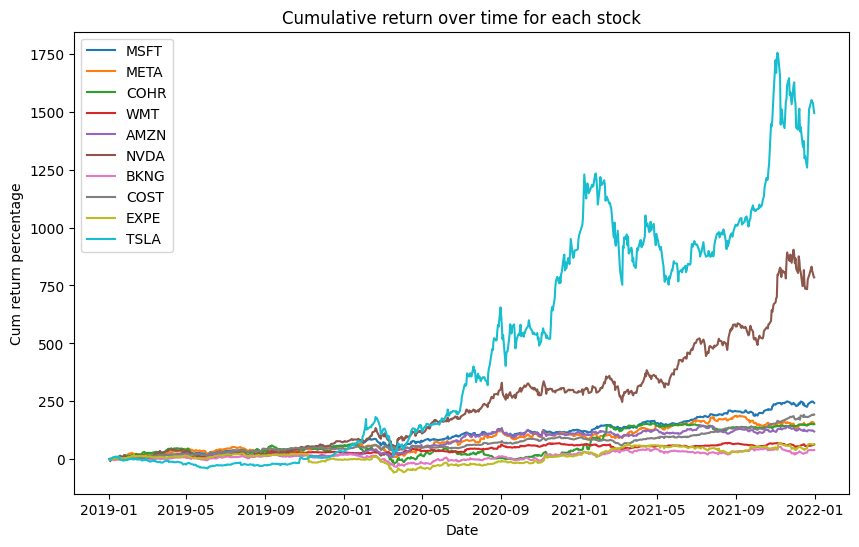

In [19]:
import matplotlib.pyplot as plt

# Ensure that 'date' is a datetime object
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Get the list of unique tickers
tickers = pd_df['TICKER'].unique()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a line for each ticker
for ticker in tickers:
    # if ticker != "BKNG":
    df_ticker = pd_df[pd_df['TICKER'] == ticker]
    plt.plot(df_ticker['date'], df_ticker['cumulative_return']*100, label=ticker)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cum return percentage')
plt.title('Cumulative return over time for each stock')

# Add a legend
plt.legend()

# Show the plot
plt.show()